## EDA (Análisis Exploratorio de los Datos)

#### *El presente análisis tiene la finalidad de explorar,comprender y obtener conocimientos más profundos sobre los datos disponibles.*

#### **Indice**
1. Introducción 
2. Estadística Descriptiva I
3. Reducción de dimensionalidad
4. Estadística Descriptiva II
5. Selección de KPIs

#### 1. Introducción

El Análisis Exploratorio de Datos (EDA) es una etapa esencial en cualquier proyecto de análisis de datos. Su objetivo principal es comprender y familiarizarse con los datos disponibles, identificar patrones, tendencias y relaciones entre las variables, para así obtener información relevante que nos guíe hacia la toma de decisiones informadas. Es una instancia necesaria para poder construir una sólida base analítica para el resto del proyecto.

En el contexto del este proyecto de análisis de la industria de las telecomunicaciones y el comportamiento del sector a nivel nacional, se espera identificar los indicadores clave que proporcionen una visión completa y significativa del estado actual de la conectividad en Argentina.

*Los objetivos específicos de este EDA son:*

- Comprender la estructura y la calidad de los datos: Esto implica verificar la consistencia de los tipos de datos, identificar y tratar los valores faltantes o nulos, y examinar la integridad de los datos en general.

- Identificar patrones y tendencias en los datos: Esto puede ayudar a obtener insights valiosos sobre el comportamiento del sector de las telecomunicaciones en Argentina, identificar áreas de crecimiento o problemas potenciales, y apoyar la toma de decisiones estratégicas.

- Analizar la distribución de variables relevantes: El EDA permitirá examinar la distribución de variables clave en el conjunto de datos, como la penetración de internet por hogares, ingresos asociados a los servicios de telecomunicaciones, velocidades de conexión, entre otros. Esto ayudará a comprender mejor la distribución de datos y evaluar posibles sesgos o desequilibrios.

- Identificar posibles relaciones entre variables: Es posible explorar la relación entre diferentes variables en el conjunto de datos para identificar posibles correlaciones o dependencias. Por ejemplo, se podría investigar si existe una correlación entre la penetración de internet en las provincias y los ingresos asociados. Estas relaciones pueden brindar información sobre posibles factores influyentes y oportunidades de mejora.

- Sugerir KPIs relevantes para el análisis: Un objetivo importante del EDA es sugerir y analizar KPIs (Key Performance Indicators) relevantes para el análisis del sector de las telecomunicaciones. Los KPIs proporcionarán métricas clave para evaluar el rendimiento, la calidad del servicio y otros aspectos importantes de la industria.

- Presentar los resultados de manera clara y efectiva: ya sea a través de visualizaciones, tablas, resúmenes estadísticos u otros medios. Se busca comunicar de manera adecuada los insights obtenidos y respaldar la toma de decisiones informadas por parte de la empresa prestadora de servicios de telecomunicaciones.


#### 2. Estadística Descriptiva I

In [5]:
# Se importan bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Se importa el dataset a analizar
accesos_df = pd.read_csv('Datasets/AccesosaInternetfijoporvelocidaddebajadaylocalidad.csv'),
conectividad_df = pd.read_csv('Datasets/ConectividadalserviciodeInternet.csv'), 
velocidad_df = pd.read_csv('Datasets/historico_velocidad_internet.csv'), 
accesos_tecno_df = pd.read_csv('Datasets/Internet_Accesos-por-tecnologia.csv'), 
accesos_vel_df = pd.read_csv('Datasets/Internet_Accesos-por-velocidad.csv'),
baf_prov_df = pd.read_csv('Datasets/Internet_BAF-por-provincia.csv'),
baf_df = pd.read_csv('Datasets/Internet_BAF.csv'),
ingresos_df = pd.read_csv('Datasets/Internet_Ingresos.csv'),
penetracion_hab_df = pd.read_csv('Datasets/Internet_Penetracion-por-100-hog_hab.csv'),
penetracion_prov_df = pd.read_csv('Datasets/Internet_Penetracion-por-100-hog-provincia.csv'),
localidades_df = pd.read_csv('Datasets/Listadodelocalidadesconconectividadainternet.csv')

##### *accesos_df*

In [7]:
# Se trata de una tupla, por la que no podemos tratar los datos como en un objeto de tipo DataFrame. Lo mismo aplica para todo el dataset a excepción de 'localidades_df'
dimensiones = len(accesos_df)
print("Dimensiones de la tupla:", dimensiones)

Dimensiones de la tupla: 1


In [8]:
accesos_df = accesos_df[0]
accesos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

In [9]:
accesos_df.describe()

,"0,256 mbps","0,375 mbps","0,512 mbps","0,625 mbps","1,25 mbps","2,2 mbps","2,5 mbps","3,3 mbps","4,5 mbps","6,4 mbps",...,65 mbps,66 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps
count,29.000000,1.0,524.000000,1.0,1.0,1.0,3.000000,1.0,1.0,1.0,...,2.000000,1.0,1.0,16.000000,1.0,1.0,1.0,2.000000,2.000000,1.0
mean,3.379310,225.0,2.173664,111.0,25.0,26.0,59.666667,6.0,65.0,13.0,...,7.000000,1.0,2.0,174.687500,1.0,1.0,14.0,2.000000,1.500000,1.0
std,6.411005,NaN,4.822112,NaN,NaN,NaN,47.648015,NaN,NaN,NaN,...,8.485281,NaN,NaN,300.673182,NaN,NaN,NaN,1.414214,0.707107,NaN
min,1.000000,225.0,1.000000,111.0,25.0,26.0,25.000000,6.0,65.0,13.0,...,1.000000,1.0,2.0,1.000000,1.0,1.0,14.0,1.000000,1.000000,1.0
25%,1.000000,225.0,1.000000,111.0,25.0,26.0,32.500000,6.0,65.0,13.0,...,4.000000,1.0,2.0,7.000000,1.0,1.0,14.0,1.500000,1.250000,1.0
50%,1.000000,225.0,1.000000,111.0,25.0,26.0,40.000000,6.0,65.0,13.0,...,7.000000,1.0,2.0,30.000000,1.0,1.0,14.0,2.000000,1.500000,1.0
75%,3.000000,225.0,1.000000,111.0,25.0,26.0,77.000000,6.0,65.0,13.0,...,10.000000,1.0,2.0,114.750000,1.0,1.0,14.0,2.500000,1.750000,1.0
max,31.000000,225.0,61.000000,111.0,25.0,26.0,114.000000,6.0,65.0,13.0,...,13.000000,1.0,2.0,952.000000,1.0,1.0,14.0,3.000000,2.000000,1.0


In [10]:
# Verificar valores faltantes
print("Valores faltantes:")
print(accesos_df.isnull().sum())

Valores faltantes:
Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2142
              ... 
85 mbps       3097
90 mbps       3096
92 mbps       3096
95 mbps       3097
100 mbps      2545
Length: 83, dtype: int64


##### *conectividad_df*

In [11]:
conectividad_df = conectividad_df[0]
conectividad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [12]:
conectividad_df.describe()

,Poblacion,link
count,4.312000e+03,4.300000e+03
mean,8.693093e+03,3.909872e+07
std,3.821544e+04,2.939305e+07
min,0.000000e+00,2.000010e+06
25%,1.160000e+02,1.009104e+07
50%,5.755000e+02,3.401053e+07
75%,3.202000e+03,6.612602e+07
max,1.317298e+06,9.401402e+07


In [13]:
# Verificar valores faltantes
print("Valores faltantes:")
print(conectividad_df.isnull().sum())

Valores faltantes:
Provincia         0
Partido           0
Localidad         0
Poblacion         0
ADSL              0
CABLEMODEM        0
DIALUP            0
FIBRAOPTICA       0
SATELITAL         0
WIRELESS          0
TELEFONIAFIJA     0
3G                0
4G                0
link             12
Latitud           0
Longitud          0
dtype: int64


##### *velocidad_df*

In [14]:
velocidad_df = velocidad_df[0]
velocidad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     35 non-null     int64 
 1   Trimestre               35 non-null     int64 
 2   Mbps (Media de bajada)  35 non-null     object
 3   Trimestre.1             35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [15]:
velocidad_df.describe()

,Año,Trimestre
count,35.000000,35.000000
mean,2017.885714,2.457143
std,2.564135,1.120474
min,2014.000000,1.000000
25%,2016.000000,1.500000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [16]:
# Verificar valores faltantes
print("Valores faltantes:")
print(velocidad_df.isnull().sum())

Valores faltantes:
Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64


##### *accesos_tecno_df*

In [17]:
accesos_tecno_df = accesos_tecno_df[0]
accesos_tecno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [18]:
accesos_tecno_df.describe()

,Año,Trimestre,Wireless,Otros
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,248.280029,147.431086
std,2.564135,1.120474,174.354293,85.868717
min,2014.000000,1.000000,70.749000,54.300000
25%,2016.000000,1.500000,85.107500,62.763500
50%,2018.000000,2.000000,194.267000,100.554000
75%,2020.000000,3.000000,394.963000,247.918500
max,2022.000000,4.000000,557.110000,265.328000


In [19]:
# Verificar valores faltantes
print("Valores faltantes:")
print(accesos_tecno_df.isnull().sum())

Valores faltantes:
Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64


##### *accesos_vel_df*

In [20]:
accesos_vel_df = accesos_vel_df[0]
accesos_vel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [21]:
accesos_vel_df.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,834.000000
mean,2017.885714,2.457143,126.009998,101.790393,71.417265,79.988627,100.758158,32.937064
std,2.528745,1.105009,187.578607,207.396126,140.324223,170.586599,208.683467,128.937905
min,2014.000000,1.000000,1.007000,0.000000,0.000000,0.000000,0.000000,-1.945000
25%,2016.000000,1.000000,10.000000,3.362500,5.357250,4.872000,2.019000,0.000000
50%,2018.000000,2.000000,50.000000,8.788000,20.157000,14.965500,11.251500,0.000000
75%,2020.000000,3.000000,134.000000,84.340500,62.225500,55.093000,64.286250,7.497750
max,2022.000000,4.000000,998.000000,999.000000,917.000000,978.000000,997.000000,923.000000


In [22]:
# Verificar valores faltantes
print("Valores faltantes:")
print(accesos_vel_df.isnull().sum())

Valores faltantes:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64


##### *baf_df*

In [23]:
baf_df = baf_df[0]
baf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [24]:
baf_df.describe()

,Año,Trimestre,Dial up
count,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,23.383371
std,2.564135,1.120474,10.087397
min,2014.000000,1.000000,9.991000
25%,2016.000000,1.500000,12.436500
50%,2018.000000,2.000000,26.911000
75%,2020.000000,3.000000,32.508500
max,2022.000000,4.000000,39.324000


In [25]:
# Verificar valores faltantes
print("Valores faltantes:")
print(baf_df.isnull().sum())

Valores faltantes:
Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64


##### *baf_prov_df*

In [26]:
baf_prov_df = baf_prov_df[0]
baf_prov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


In [27]:
baf_prov_df.describe()

,Año,Trimestre
count,840.000000,840.000000
mean,2017.885714,2.457143
std,2.528745,1.105009
min,2014.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [28]:
# Verificar valores faltantes
print("Valores faltantes:")
print(baf_prov_df.isnull().sum())

Valores faltantes:
Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64


##### *ingresos_df*

In [29]:
ingresos_df = ingresos_df[0]
ingresos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [30]:
ingresos_df.describe()

,Año,Trimestre
count,35.000000,35.000000
mean,2017.885714,2.457143
std,2.564135,1.120474
min,2014.000000,1.000000
25%,2016.000000,1.500000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [31]:
# Verificar valores faltantes
print("Valores faltantes:")
print(ingresos_df.isnull().sum())

Valores faltantes:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


##### *penetracion_hab_df*

In [32]:
penetracion_hab_df = penetracion_hab_df[0]
penetracion_hab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [33]:
penetracion_hab_df.describe()

,Año,Trimestre
count,35.000000,35.000000
mean,2017.885714,2.457143
std,2.564135,1.120474
min,2014.000000,1.000000
25%,2016.000000,1.500000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [34]:
# Verificar valores faltantes
print("Valores faltantes:")
print(penetracion_hab_df.isnull().sum())

Valores faltantes:
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64


##### *penetracion_prov_df*

In [35]:
penetracion_prov_df = penetracion_prov_df[0]
penetracion_prov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [36]:
penetracion_prov_df.describe()

,Año,Trimestre
count,840.000000,840.000000
mean,2017.885714,2.457143
std,2.528745,1.105009
min,2014.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [37]:
# Verificar valores faltantes
print("Valores faltantes:")
print(penetracion_prov_df.isnull().sum())

Valores faltantes:
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64


##### *localidades_df*

In [38]:
localidades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   ADSL           4312 non-null   object
 4   CABLEMODEM     4312 non-null   object
 5   DIALUP         4312 non-null   object
 6   FIBRAOPTICA    4312 non-null   object
 7   4G             4312 non-null   object
 8   3G             4312 non-null   object
 9   TELEFONIAFIJA  4312 non-null   object
 10  WIRELESS       4312 non-null   object
 11  SATELITAL      4312 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


In [39]:
localidades_df.describe()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
count,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,SI,--,SI,SI,--
freq,901,85,12,3179,3436,3909,2866,2574,2432,2162,2242,3233


In [40]:
# Verificar valores faltantes
print("Valores faltantes:")
print(localidades_df.isnull().sum())

Valores faltantes:
Provincia        0
Partido          0
Localidad        0
ADSL             0
CABLEMODEM       0
DIALUP           0
FIBRAOPTICA      0
4G               0
3G               0
TELEFONIAFIJA    0
WIRELESS         0
SATELITAL        0
dtype: int64


#### 3. Reducción de Dimensionalidad

##### *Reducción vertical:*

A) Criterio de eliminación por ratio de valores perdidos:

In [41]:
''' 
# Lista de tuplas que contiene el nombre del DataFrame y el DataFrame en sí
dataframes = [('accesos_df', accesos_df), ('conectividad_df', conectividad_df), ('velocidad_df', velocidad_df), ('accesos_tecno_df', accesos_tecno_df), ('accesos_vel_df', accesos_vel_df), ('baf_prov_df', baf_prov_df), ('baf_df', baf_df), ('ingresos_df', ingresos_df), ('penetracion_hab_df', penetracion_hab_df), ('penetracion_prov_df', penetracion_prov_df), ('localidades_df', localidades_df)]

# Umbral para determinar qué variables eliminar
threshold = 0.02

# Iteración sobre cada tupla de la lista
for name, df in dataframes:
    # Cálculo de la proporción de valores faltantes para cada columna del DataFrame
    missing_ratio = df.isnull().mean()
    # Identificación de las columnas que superan el umbral de proporción de valores faltantes
    variables_to_drop = missing_ratio[missing_ratio > threshold].index
    # Eliminación de las columnas identificadas
    df.drop(columns=variables_to_drop, inplace=True)
    
    print(f"Variables eliminadas en {name}: {variables_to_drop}")
'''

' \n# Lista de tuplas que contiene el nombre del DataFrame y el DataFrame en sí\ndataframes = [(\'accesos_df\', accesos_df), (\'conectividad_df\', conectividad_df), (\'velocidad_df\', velocidad_df), (\'accesos_tecno_df\', accesos_tecno_df), (\'accesos_vel_df\', accesos_vel_df), (\'baf_prov_df\', baf_prov_df), (\'baf_df\', baf_df), (\'ingresos_df\', ingresos_df), (\'penetracion_hab_df\', penetracion_hab_df), (\'penetracion_prov_df\', penetracion_prov_df), (\'localidades_df\', localidades_df)]\n\n# Umbral para determinar qué variables eliminar\nthreshold = 0.02\n\n# Iteración sobre cada tupla de la lista\nfor name, df in dataframes:\n    # Cálculo de la proporción de valores faltantes para cada columna del DataFrame\n    missing_ratio = df.isnull().mean()\n    # Identificación de las columnas que superan el umbral de proporción de valores faltantes\n    variables_to_drop = missing_ratio[missing_ratio > threshold].index\n    # Eliminación de las columnas identificadas\n    df.drop(columns

**¡IMPORTANTE!** Cabe destacar que si aplicamos este criterio de eliminación al dataser accesos_df, terminarían siendo eliminadas todas las columnas con datos numéricos. Esto resultaría en una pérdida significativa de información, por lo que se opta por no ejercer dicho tratamiento. En su lugar, se opta por Eliminar toda columna con un numero de valores nulos por encima de 3000 registros. Si bien no es un escenario óptimo, nos permite reducir moderadamente el número de columnas, como para poder trabajar cómodamente a la hora de visualizar los datos mediante herramientas gráficas.

In [42]:
# Calcular la cantidad de valores nulos en cada columna
null_counts = accesos_df.isnull().sum()

# Obtener las columnas con más de 3000 valores nulos
columns_to_drop = null_counts[null_counts > 3000].index

# Imprimir las columnas eliminadas
print("Columnas eliminadas:")
for column in columns_to_drop:
    print(column)

# Eliminar las columnas identificadas
accesos_df.drop(columns=columns_to_drop, inplace=True)


Columnas eliminadas:
0,256 mbps
0,375 mbps
0,625 mbps
1,25 mbps
1,5 mbps
2,2 mbps
2,5 mbps
3,3 mbps
4,5 mbps
6,4 mbps
7,5 mbps
9 mbps
11 mbps
13 mbps
14 mbps
16 mbps
17 mbps
19 mbps
21 mbps
22 mbps
23 mbps
24 mbps
25,1 mbps
25,11 mbps
25,5 mbps
26 mbps
31 mbps
32 mbps
34 mbps
35 mbps
36 mbps
38 mbps
39 mbps
40 mbps
41 mbps
45 mbps
46 mbps
49 mbps
55 mbps
58 mbps
59 mbps
61 mbps
62 mbps
64 mbps
65 mbps
66 mbps
70 mbps
78 mbps
80 mbps
82 mbps
83 mbps
85 mbps
90 mbps
92 mbps
95 mbps


In [43]:
accesos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,5 mbps    643 non-null    object 
 6   0,512 mbps  524 non-null    float64
 7   0,75 mbps   284 non-null    object 
 8   1 mbps      931 non-null    object 
 9   2 mbps      741 non-null    object 
 10  3 mbps      1388 non-null   object 
 11  3,5 mbps    373 non-null    object 
 12  4 mbps      539 non-null    object 
 13  5 mbps      1013 non-null   object 
 14  6 mbps      1436 non-null   object 
 15  7 mbps      221 non-null    object 
 16  8 mbps      616 non-null    object 
 17  10 mbps     1685 non-null   object 
 18  12 mbps     519 non-null    object 
 19  15 mbps     1020 non-null  

Como se puede observar, se pudo reducir desde más de 80 campos a un total de 28, lo que resulta mucho más coherente a la hora de llevar a cabo un análisis estadístico descriptivo. Además, como las columnas contaban con proporciones de datos nulos por encima del 2%, tenemos la certeza de que las mismas no aportaban una variablidad estadística en la que podamos confiar.

B) Criterio de eliminación por el tipo de información que aporta:
- Las variables no aportan información pertinente a los objetivos del proyecto.
- Las variables aportan variabilidad estadística.

In [44]:
# Eliminan columnas duplicadas
velocidad_df.drop(columns='Trimestre.1', inplace=True)
accesos_tecno_df.drop(columns='Periodo', inplace=True)
baf_df.drop(columns='Periodo', inplace=True)
ingresos_df.drop(columns='Periodo', inplace=True)
penetracion_hab_df.drop(columns='Periodo', inplace=True)

##### *Reducción horizontal:*

Eliminación de fulas duplicadas:

In [45]:
dataframes = [('accesos_df', accesos_df), ('conectividad_df', conectividad_df), ('velocidad_df', velocidad_df), ('accesos_tecno_df', accesos_tecno_df), ('accesos_vel_df', accesos_vel_df), ('baf_prov_df', baf_prov_df), ('baf_df', baf_df), ('ingresos_df', ingresos_df), ('penetracion_hab_df', penetracion_hab_df), ('penetracion_prov_df', penetracion_prov_df), ('localidades_df', localidades_df)]

for name, df in dataframes:
    initial_rows = df.shape[0]  # Obtener el número de filas inicial
    df.drop_duplicates(inplace=True)  # Eliminar filas duplicadas en el DataFrame
    removed_rows = initial_rows - df.shape[0]  # Calcular la cantidad de filas eliminadas
    print(f"Filas eliminadas en {name}: {removed_rows}")


Filas eliminadas en accesos_df: 0
Filas eliminadas en conectividad_df: 0
Filas eliminadas en velocidad_df: 0
Filas eliminadas en accesos_tecno_df: 0
Filas eliminadas en accesos_vel_df: 0
Filas eliminadas en baf_prov_df: 0
Filas eliminadas en baf_df: 0
Filas eliminadas en ingresos_df: 0
Filas eliminadas en penetracion_hab_df: 0
Filas eliminadas en penetracion_prov_df: 0
Filas eliminadas en localidades_df: 2


#### 4. Estadística Descriptiva II

##### 4.1 Variables numéricas

**4.1.1 Análisis de correlación**

##### *accesos_df*

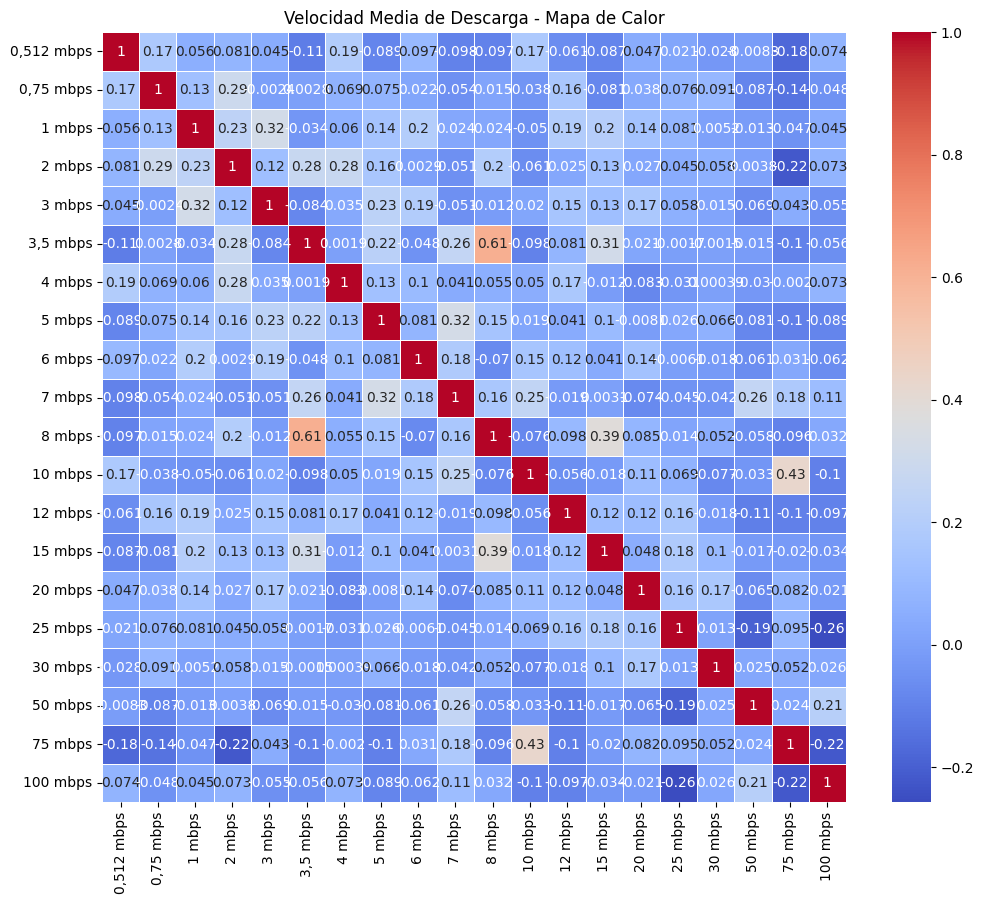

In [47]:
# Convertir columnas numéricas a tipo float
numeric_columns = ['0,512 mbps', '0,75 mbps', '1 mbps', '2 mbps', '3 mbps', '3,5 mbps', '4 mbps',
                   '5 mbps', '6 mbps', '7 mbps', '8 mbps', '10 mbps', '12 mbps', '15 mbps',
                   '20 mbps', '25 mbps', '30 mbps', '50 mbps', '75 mbps', '100 mbps']

accesos_df[numeric_columns] = accesos_df[numeric_columns].replace(',', '.', regex=True).astype(float)

# Calcular la matriz de correlación
correlation_matrix = accesos_df[numeric_columns].corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Visualización del mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Velocidad Media de Descarga - Mapa de Calor')
plt.show()



##### *velocidad_df*

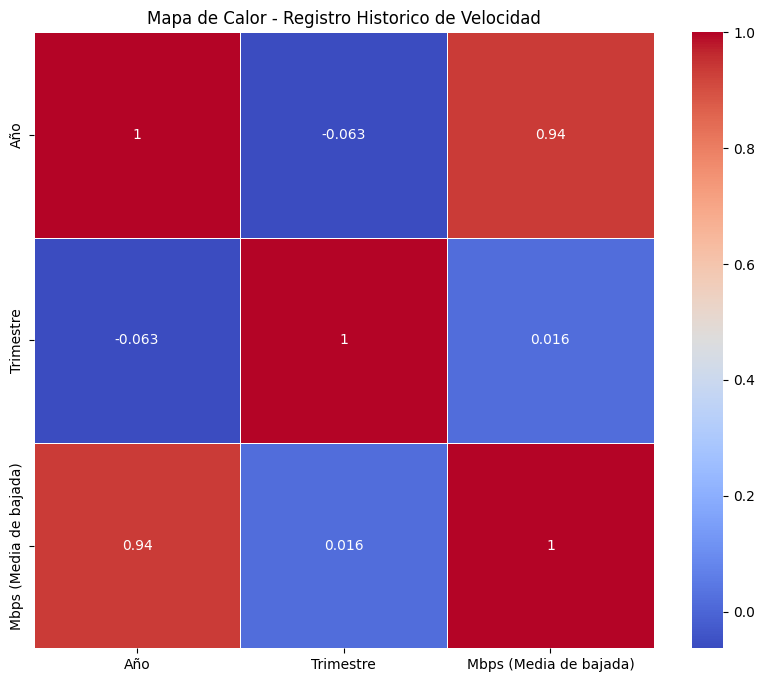

In [48]:
# Convertir  columna 'Mbps (Media de bajada)' a string y reemplazar comas por puntos
velocidad_df['Mbps (Media de bajada)'] = velocidad_df['Mbps (Media de bajada)'].astype(str).str.replace(',', '.')

# Convertir columna 'Mbps (Media de bajada)' a tipo numérico
velocidad_df['Mbps (Media de bajada)'] = pd.to_numeric(velocidad_df['Mbps (Media de bajada)'])

# Calcular matriz de correlación
correlation_matrix = velocidad_df.corr()

# Ajustar tamaño de la figura
plt.figure(figsize=(10, 8))

# Visualización del mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor - Registro Historico de Velocidad')
plt.show()


##### *accesos_tecno_df*

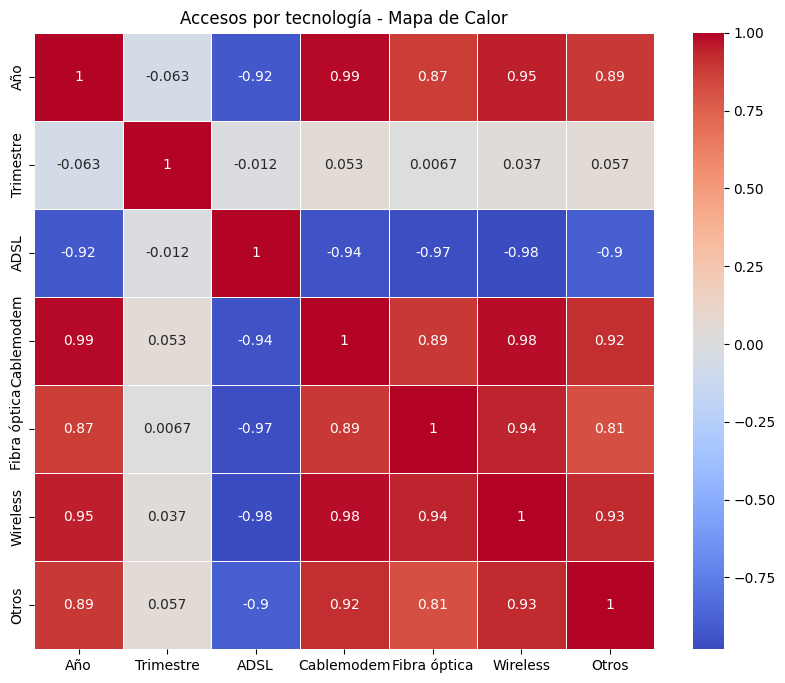

In [49]:

# Convertir columnas numéricas a tipo float
numeric_columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
accesos_tecno_df[numeric_columns] = accesos_tecno_df[numeric_columns].replace('\.', '', regex=True).replace(',', '.', regex=True).astype(float)

# Eliminar columna 'Total' (si no se ha eliminado previamente)
accesos_tecno_df.drop(columns='Total', inplace=True)

# Calcular la matriz de correlación
correlation_matrix = accesos_tecno_df.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Visualización del mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Accesos por tecnología - Mapa de Calor')
plt.show()



##### *accesos_vel_df* 

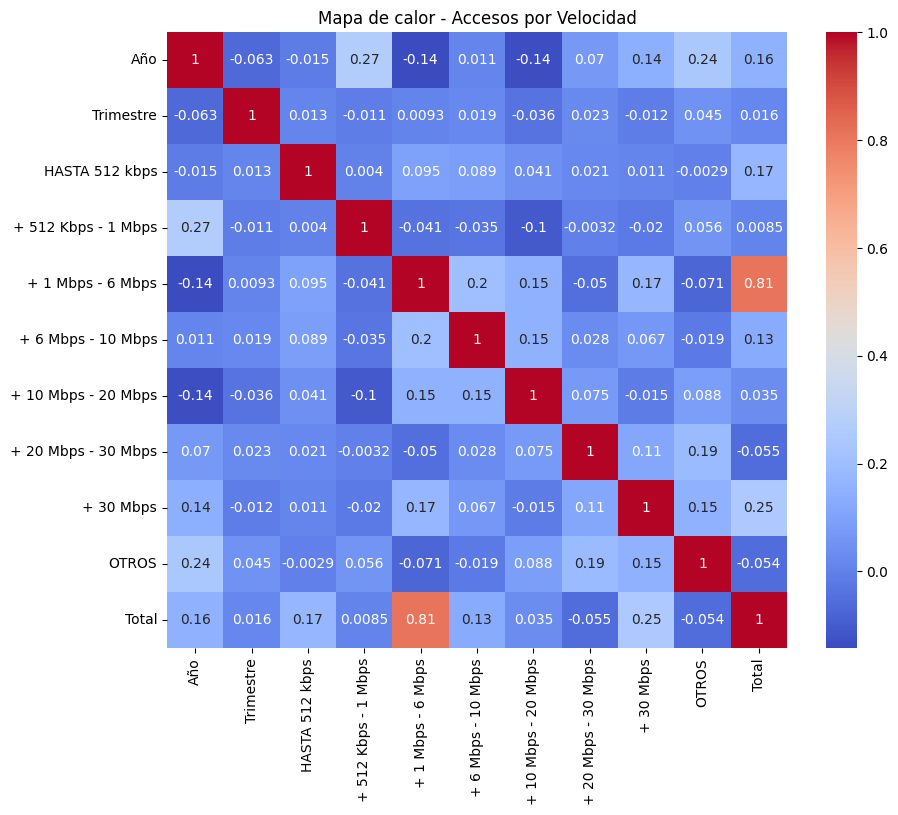

In [50]:
accesos_vel_df_numeric = accesos_vel_df.drop('Provincia', axis=1)
accesos_vel_df_numeric['+ 1 Mbps - 6 Mbps'] = pd.to_numeric(accesos_vel_df_numeric['+ 1 Mbps - 6 Mbps'], errors='coerce')
accesos_vel_df_numeric['+ 30 Mbps'] = pd.to_numeric(accesos_vel_df_numeric['+ 30 Mbps'], errors='coerce')
accesos_vel_df_numeric['Total'] = pd.to_numeric(accesos_vel_df_numeric['Total'], errors='coerce')

correlation_matrix = accesos_vel_df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor - Accesos por Velocidad')
plt.show()

##### *baf_prov_df* 

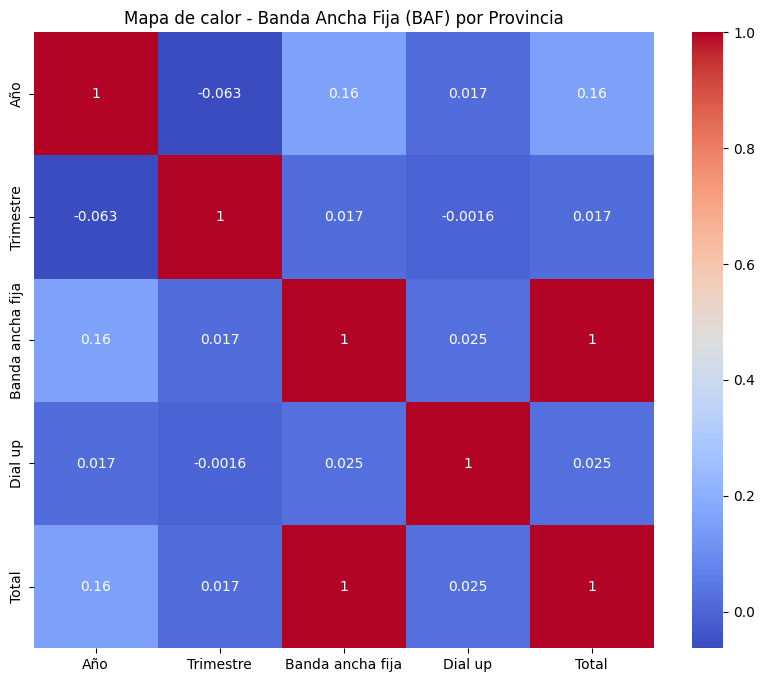

In [51]:
baf_prov_df_numeric = baf_prov_df.drop('Provincia', axis=1)
baf_prov_df_numeric['Banda ancha fija'] = pd.to_numeric(baf_prov_df_numeric['Banda ancha fija'], errors='coerce')
baf_prov_df_numeric['Dial up'] = pd.to_numeric(baf_prov_df_numeric['Dial up'], errors='coerce')
baf_prov_df_numeric['Total'] = pd.to_numeric(baf_prov_df_numeric['Total'], errors='coerce')

correlation_matrix = baf_prov_df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor - Banda Ancha Fija (BAF) por Provincia')
plt.show()

##### *baf_df* 

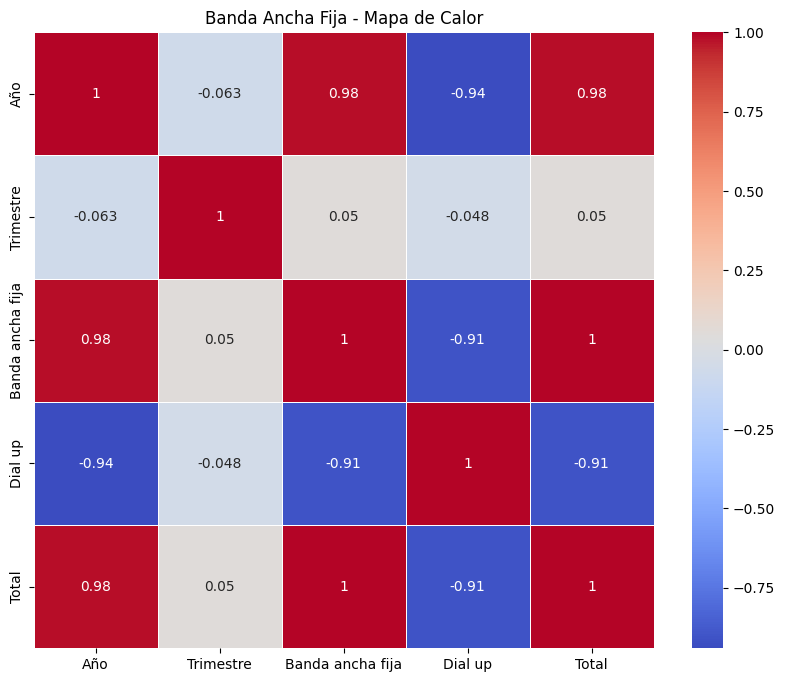

In [52]:
# Eliminar puntos y reemplazar comas por puntos para las columnas "Banda ancha fija" y "Total"
baf_df['Banda ancha fija'] = baf_df['Banda ancha fija'].replace('\.', '', regex=True).replace(',', '.', regex=True)
baf_df['Total'] = baf_df['Total'].replace('\.', '', regex=True).replace(',', '.', regex=True)

# Convertir las columnas a tipo float
baf_df['Banda ancha fija'] = baf_df['Banda ancha fija'].astype(float)
baf_df['Total'] = baf_df['Total'].astype(float)

# Calcular la matriz de correlación
correlation_matrix = baf_df.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Visualización del mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Banda Ancha Fija - Mapa de Calor')
plt.show()

##### *ingresos_df* 


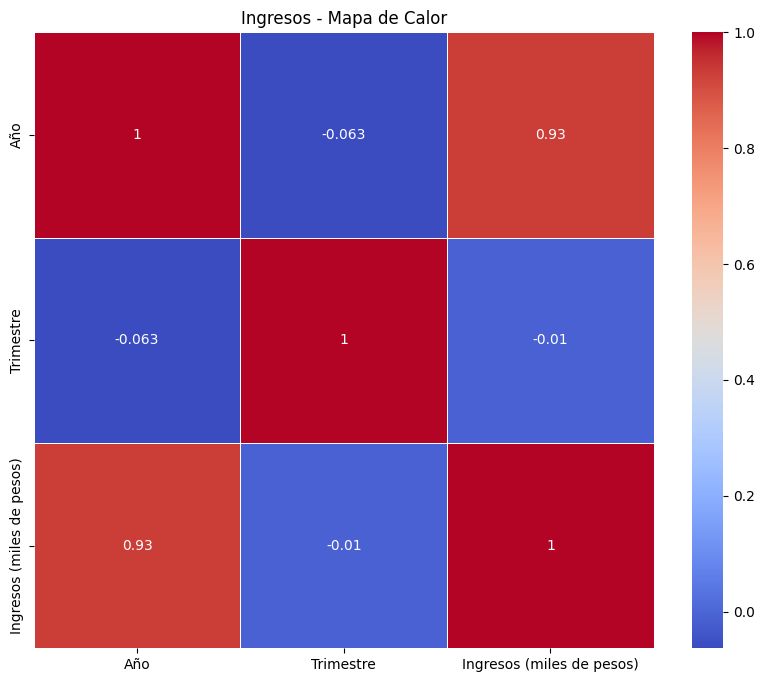

In [53]:
# Eliminar puntos y reemplazar comas por puntos para la columna "Ingresos (miles de pesos)"
ingresos_df['Ingresos (miles de pesos)'] = ingresos_df['Ingresos (miles de pesos)'].replace('\.', '', regex=True).replace(',', '.', regex=True)

# Convertir la columna a tipo float
ingresos_df['Ingresos (miles de pesos)'] = ingresos_df['Ingresos (miles de pesos)'].astype(float)

# Calcular la matriz de correlación
correlation_matrix = ingresos_df.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Visualización del mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ingresos - Mapa de Calor')
plt.show()

##### *penetracion_hab_df* 

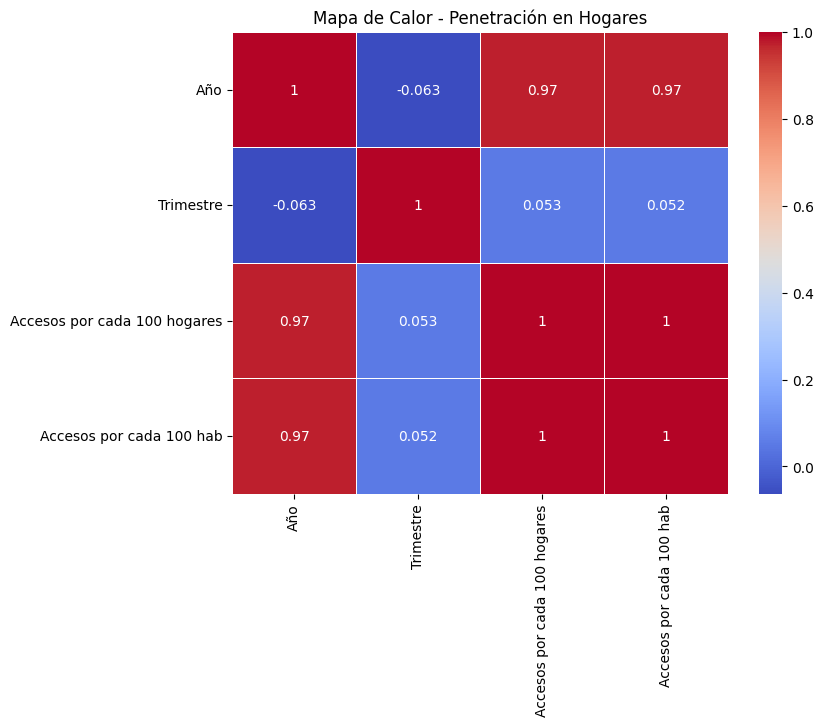

In [54]:
# Eliminar las comillas y convertir las columnas a tipo numérico
numeric_columns = ['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']
penetracion_hab_df[numeric_columns] = penetracion_hab_df[numeric_columns].replace(',', '.', regex=True).astype(float)

# Calcular la matriz de correlación
correlation_matrix = penetracion_hab_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor - Penetración en Hogares')
plt.show()

##### *penetracion_prov_df* 

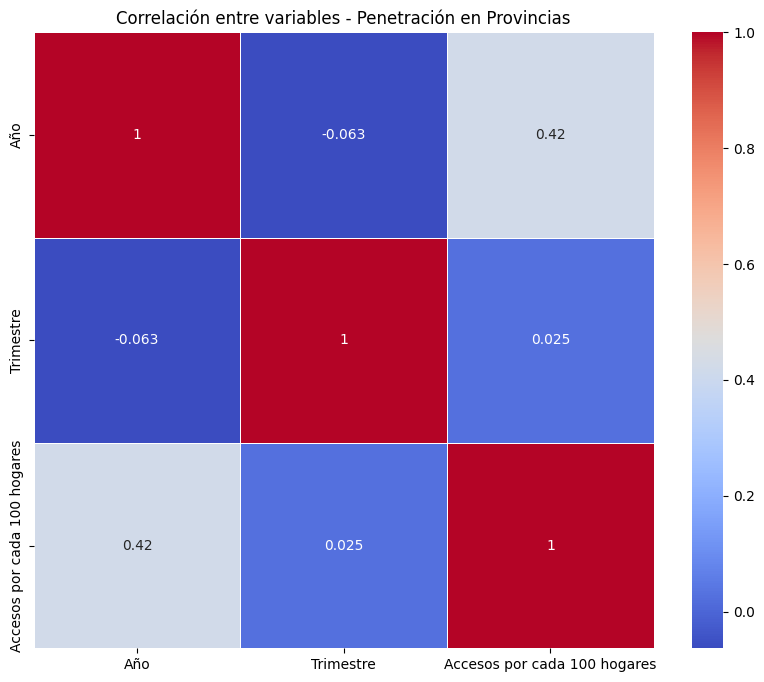

In [55]:
# Eliminar las comillas y convertir la columna a tipo numérico
penetracion_prov_df['Accesos por cada 100 hogares'] = penetracion_prov_df['Accesos por cada 100 hogares'].replace(',', '.', regex=True).astype(float)

# Excluir la columna "Provincia" de la matriz de correlación
correlation_matrix = penetracion_prov_df.drop('Provincia', axis=1).corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre variables - Penetración en Provincias')
plt.show()


**4.1.2 Anlálisis de distribución**

##### *accesos_df*

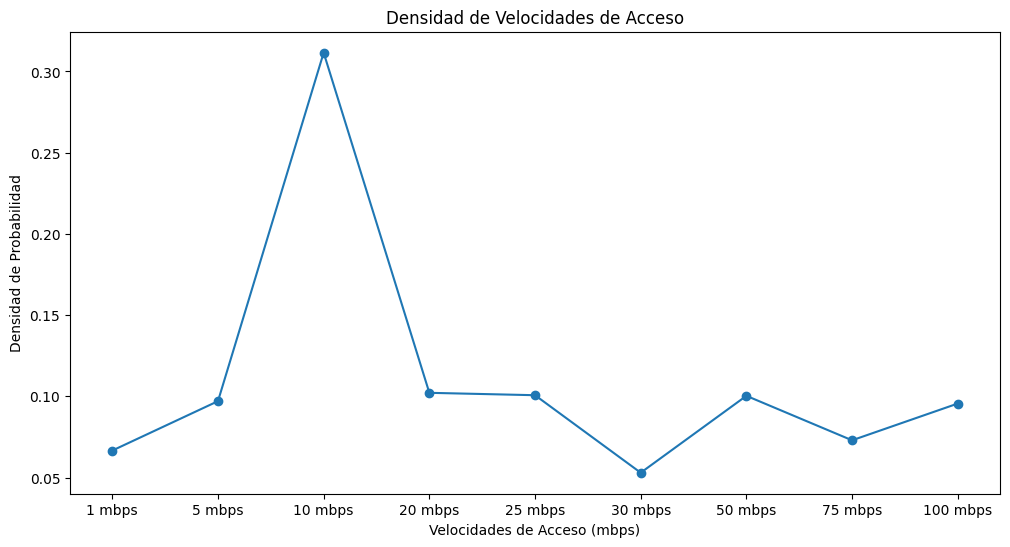

In [56]:
# Seleccionar las columnas numéricas de interés
selected_columns = ["1 mbps", "5 mbps", "10 mbps", "20 mbps", "25 mbps", "30 mbps", "50 mbps", "75 mbps", "100 mbps"]

# Convertir las columnas seleccionadas a tipo float
accesos_df[selected_columns] = accesos_df[selected_columns].replace(",", ".", regex=True).astype(float)

# Llenar los valores NaN con cero
accesos_df.fillna(0, inplace=True)

# Calcular la suma total de frecuencias
total_frequencies = accesos_df[selected_columns].sum().sum()

# Calcular la probabilidad dividiendo cada frecuencia por la suma total de frecuencias
probabilities = accesos_df[selected_columns].sum() / total_frequencies

# Crear el gráfico de densidad
plt.figure(figsize=(12, 6))
plt.title("Densidad de Velocidades de Acceso")
plt.xlabel("Velocidades de Acceso (mbps)")
plt.ylabel("Densidad de Probabilidad")

# Calcular y graficar la densidad de probabilidad
plt.plot(probabilities.index, probabilities.values, marker='o', linestyle='-')

# Mostrar el gráfico de densidad
plt.show()

##### *velocidad_df*

C:\Users\crest\AppData\Local\Temp\ipykernel_360\3317062668.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=velocidad_df["Mbps (Media de bajada)"], fill=True, common_norm=False, palette='viridis', alpha=0.7)


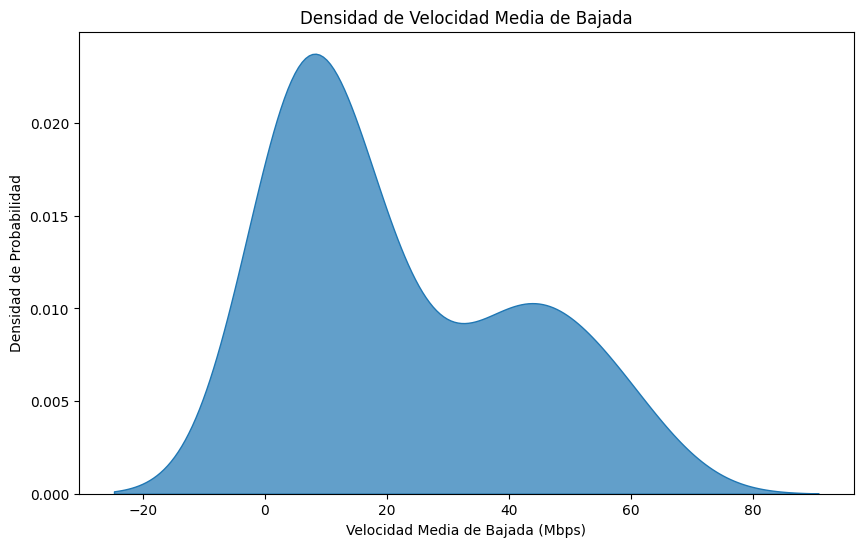

In [57]:
# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=velocidad_df["Mbps (Media de bajada)"], fill=True, common_norm=False, palette='viridis', alpha=0.7)

# Agregar título y etiquetas de los ejes
plt.title("Densidad de Velocidad Media de Bajada")
plt.xlabel("Velocidad Media de Bajada (Mbps)")
plt.ylabel("Densidad de Probabilidad")

# Mostrar el gráfico de densidad
plt.show()

##### *accesos_tecno_df* 

In [58]:
accesos_tecno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     float64
 3   Cablemodem    35 non-null     float64
 4   Fibra óptica  35 non-null     float64
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.0 KB


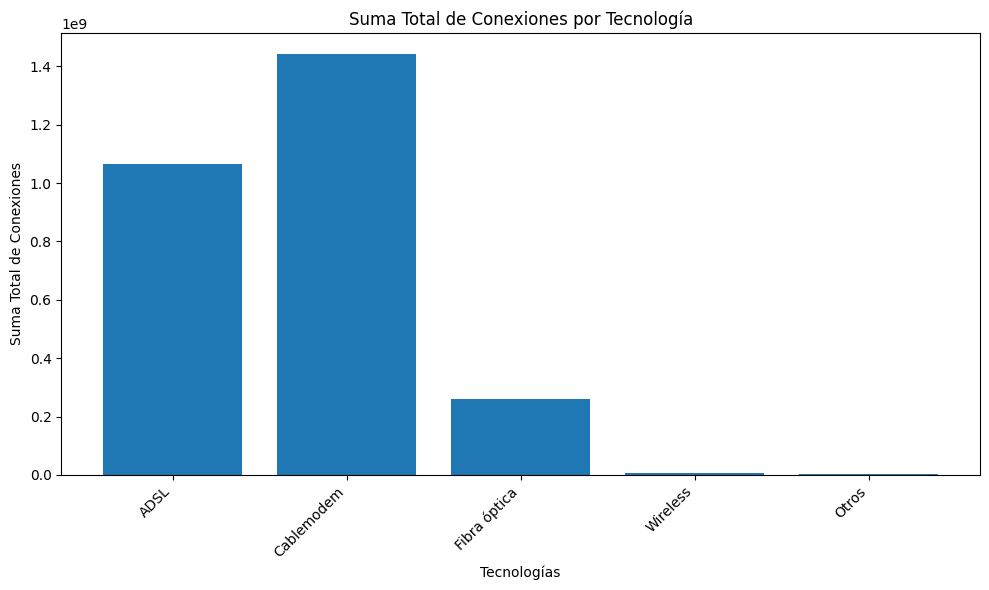

In [59]:
# Convertir las columnas a tipo string
tecnologias_columns = ["ADSL", "Cablemodem", "Fibra óptica", "Wireless", "Otros"]
accesos_tecno_df[tecnologias_columns] = accesos_tecno_df[tecnologias_columns].astype(str)

# Eliminar los puntos en los datos de las columnas "ADSL", "Cablemodem", "Fibra óptica", "Wireless" y "Otros"
for tecnologia in tecnologias_columns:
    accesos_tecno_df[tecnologia] = accesos_tecno_df[tecnologia].str.replace('.', '')

# Convertir las columnas a tipo numérico
accesos_tecno_df[tecnologias_columns] = accesos_tecno_df[tecnologias_columns].apply(pd.to_numeric)

# Calcular la suma total de cada tecnología
sum_total = accesos_tecno_df[tecnologias_columns].sum()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(tecnologias_columns, sum_total)

# Agregar título y etiquetas de los ejes
plt.title("Suma Total de Conexiones por Tecnología")
plt.xlabel("Tecnologías")
plt.ylabel("Suma Total de Conexiones")

# Mostrar el histograma
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### *accesos_vel_df* 

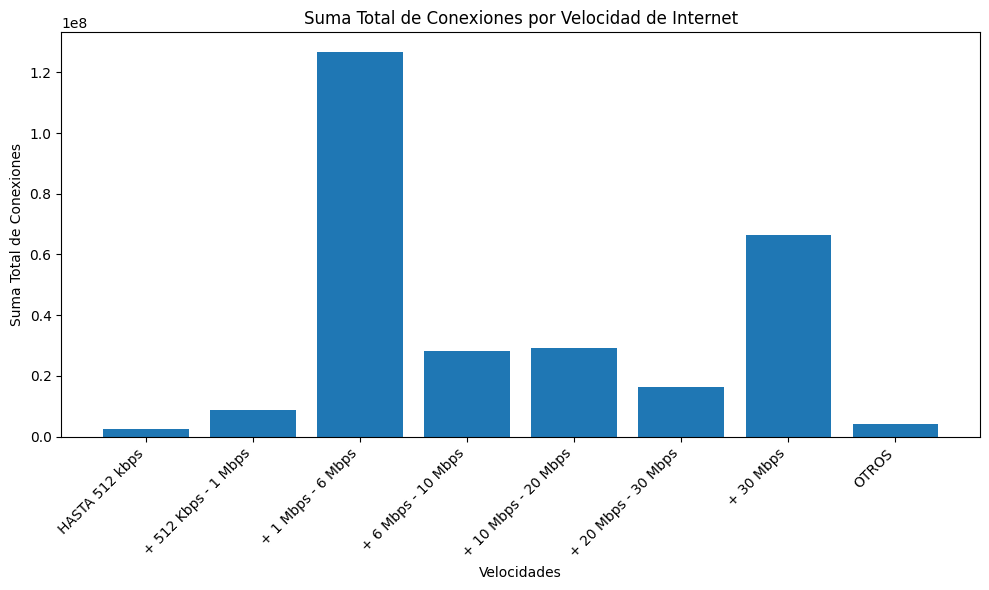

In [60]:
# Convertir las columnas a tipo string
velocidades_columns = ["HASTA 512 kbps", "+ 512 Kbps - 1 Mbps", "+ 1 Mbps - 6 Mbps", "+ 6 Mbps - 10 Mbps", "+ 10 Mbps - 20 Mbps", "+ 20 Mbps - 30 Mbps", "+ 30 Mbps", "OTROS"]
accesos_vel_df[velocidades_columns] = accesos_vel_df[velocidades_columns].astype(str)

# Eliminar los puntos en los datos de las columnas
for velocidad in velocidades_columns:
    accesos_vel_df[velocidad] = accesos_vel_df[velocidad].str.replace('.', '')

# Convertir las columnas a tipo numérico
accesos_vel_df[velocidades_columns] = accesos_vel_df[velocidades_columns].apply(pd.to_numeric, errors='coerce')

#Calcular la suma total de cada velocidad
sum_total = accesos_vel_df[velocidades_columns].sum()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(velocidades_columns, sum_total)

# Agregar título y etiquetas de los ejes
plt.title("Suma Total de Conexiones por Velocidad de Internet")
plt.xlabel("Velocidades")
plt.ylabel("Suma Total de Conexiones")

# Mostrar el histograma
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### *baf_prov_df* 

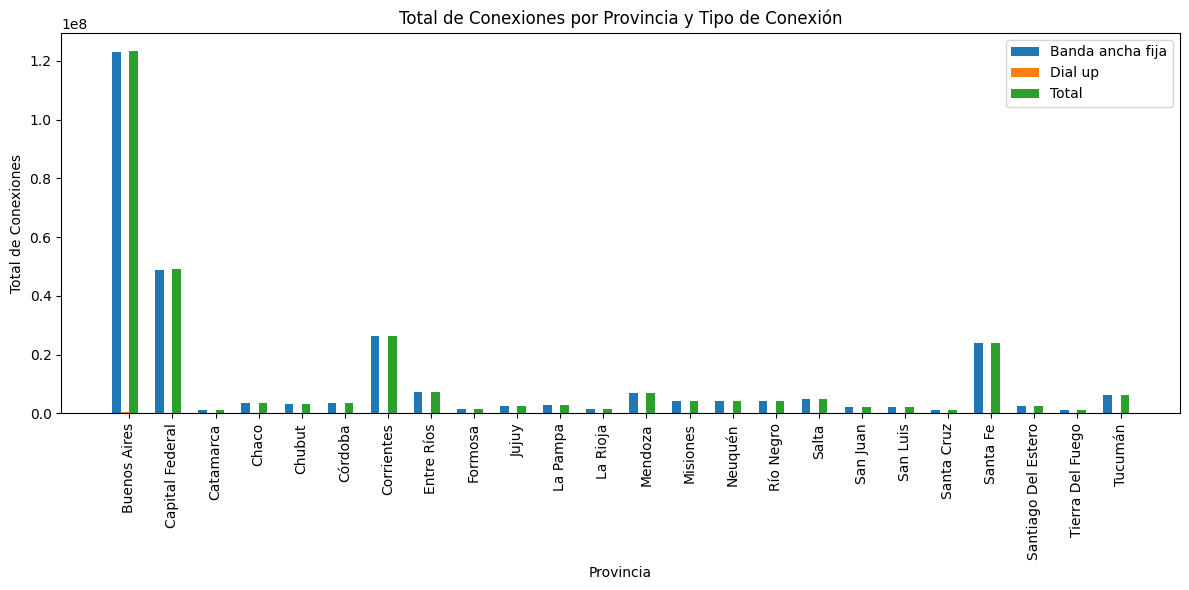

In [61]:
# Convertir las columnas a tipo string
baf_prov_columns = ["Banda ancha fija", "Dial up", "Total"]
baf_prov_df[baf_prov_columns] = baf_prov_df[baf_prov_columns].astype(str)

# Eliminar los puntos en los datos de las columnas
for baf_prov in baf_prov_columns:
    baf_prov_df[baf_prov] = baf_prov_df[baf_prov].str.replace('.', '')

# Convertir las columnas a tipo numérico
baf_prov_df[baf_prov_columns] = baf_prov_df[baf_prov_columns].apply(pd.to_numeric, errors='coerce')

columnas_numericas = ["Banda ancha fija", "Dial up", "Total"]

# Crear el histograma por provincia y por tipo de conexión
plt.figure(figsize=(12, 6))
provincias = baf_prov_df["Provincia"].unique().tolist()  # Convertimos la serie a una lista
bar_width = 0.2
offset = -0.3
for i, columna in enumerate(columnas_numericas):
    posicion = i * bar_width
    plt.bar([x + offset for x in range(len(provincias))], baf_prov_df.groupby("Provincia")[columna].sum(), width=bar_width, label=columna)
    offset += bar_width

# Agregar título y etiquetas de los ejes
plt.title("Total de Conexiones por Provincia y Tipo de Conexión")
plt.xlabel("Provincia")
plt.ylabel("Total de Conexiones")

# Agregar leyenda
plt.legend()

# Ajustar los ticks del eje x para mejorar la visualización
plt.xticks(range(len(provincias)), provincias, rotation=90)

# Mostrar el histograma
plt.tight_layout()
plt.show()

##### *baf_df* 

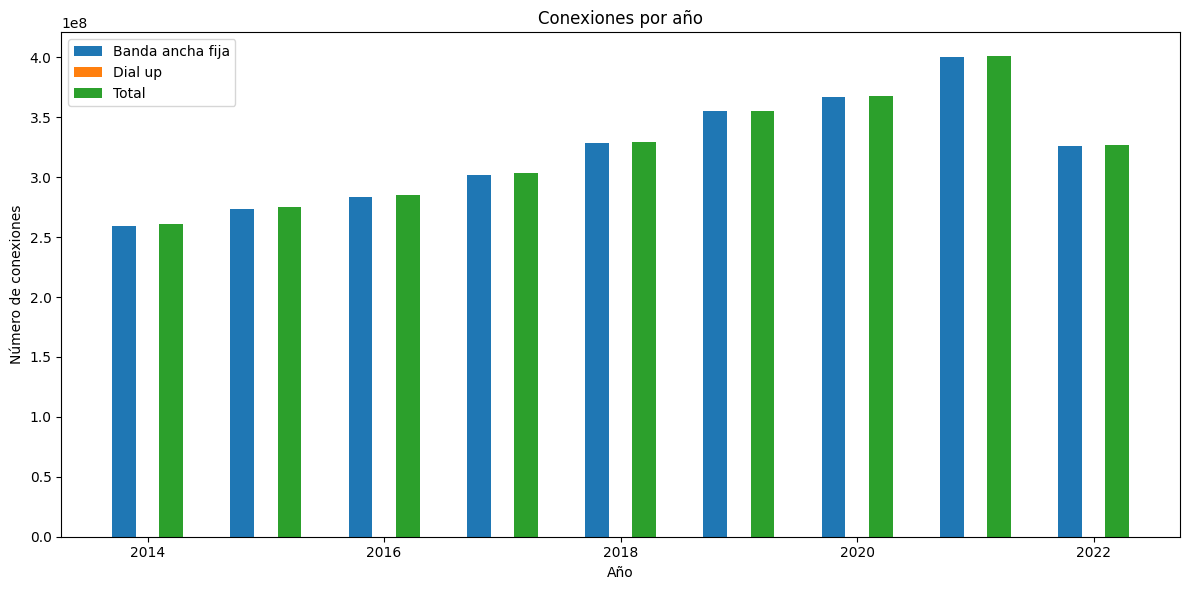

In [62]:
# Convertir las columnas a tipo string
baf_columns = ["Banda ancha fija", "Dial up", "Total"]
baf_df[baf_columns] = baf_df[baf_columns].astype(str)

# Eliminar los puntos en los datos de las columnas
for baf in baf_columns:
    baf_df[baf] = baf_df[baf].str.replace('.', '')

# Convertir las columnas a tipo numérico
baf_df[baf_columns] = baf_df[baf_columns].apply(pd.to_numeric, errors='coerce')

#Calcular la suma total de cada velocidad
sum_total = baf_df[baf_columns].sum()

# Agrupar los datos por año y calcular las sumas
data_grouped = baf_df.groupby('Año').sum()

# Obtener los años y las conexiones de cada columna
years = data_grouped.index
broadband_connections = data_grouped['Banda ancha fija']
dialup_connections = data_grouped['Dial up']
total_connections = data_grouped['Total']

# Crear el histograma con tres barras por año
plt.figure(figsize=(12, 6))
bar_width = 0.2

plt.bar(years - bar_width, broadband_connections, bar_width, label='Banda ancha fija')
plt.bar(years, dialup_connections, bar_width, label='Dial up')
plt.bar(years + bar_width, total_connections, bar_width, label='Total')

# Agregar título y etiquetas de los ejes
plt.title("Conexiones por año")
plt.xlabel("Año")
plt.ylabel("Número de conexiones")

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.tight_layout()
plt.show()

##### *ingresos_df* 


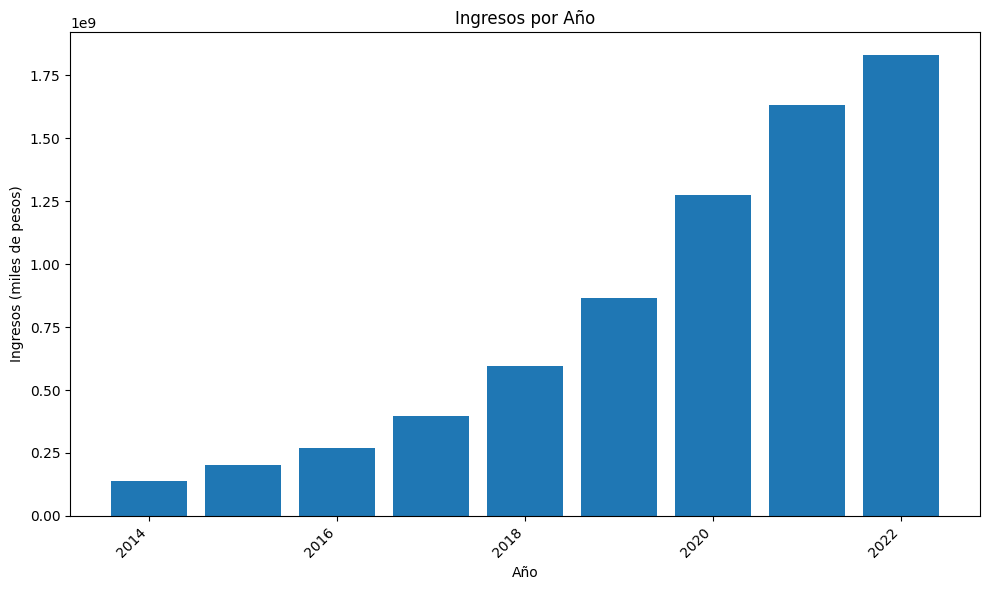

In [63]:
# Convertir las columnas a tipo string
ingresos_columns = ["Año", "Trimestre", "Ingresos (miles de pesos)"]
ingresos_df[ingresos_columns] = ingresos_df[ingresos_columns].astype(str)

# Eliminar los puntos en los datos de las columnas
for ingreso in ingresos_columns:
    ingresos_df[ingreso] = ingresos_df[ingreso].str.replace('.', '')

# Convertir las columnas a tipo numérico
ingresos_df[ingresos_columns] = ingresos_df[ingresos_columns].apply(pd.to_numeric, errors='coerce')

# Agrupar por año y calcular la suma total de ingresos para cada año
ingresos_por_anio = ingresos_df.groupby("Año")["Ingresos (miles de pesos)"].sum()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(ingresos_por_anio.index, ingresos_por_anio.values)

# Agregar título y etiquetas de los ejes
plt.title("Ingresos por Año")
plt.xlabel("Año")
plt.ylabel("Ingresos (miles de pesos)")

# Mostrar el histograma
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### *penetracion_hab_df* 

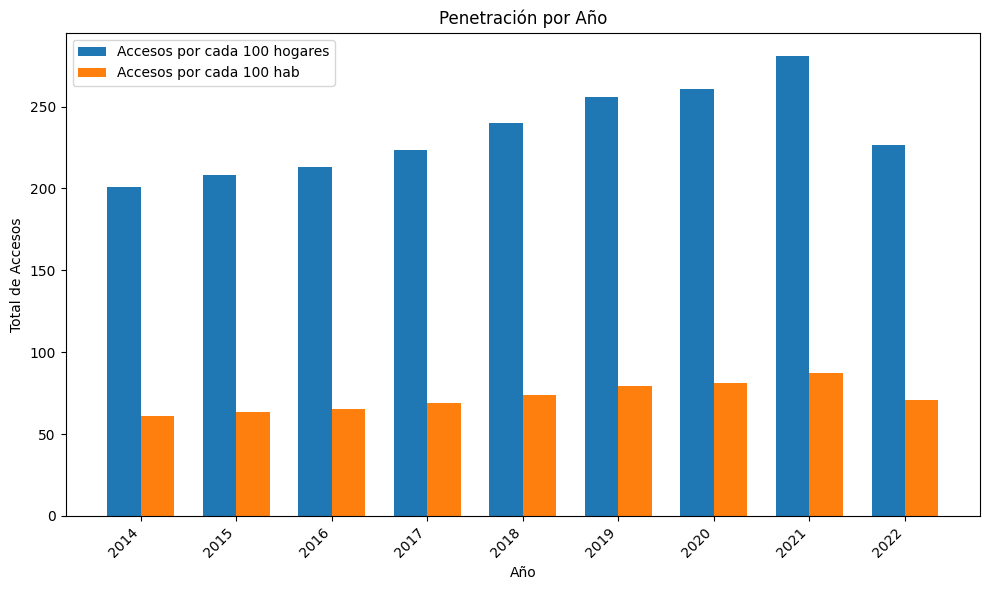

In [64]:
# Convertir las columnas a tipo string
penetracion_columns = ["Año", "Trimestre", "Accesos por cada 100 hogares", "Accesos por cada 100 hab"]
penetracion_hab_df[penetracion_columns] = penetracion_hab_df[penetracion_columns].astype(str)

# Eliminar comas y comillas en las columnas "Accesos por cada 100 hogares" y "Accesos por cada 100 hab"
penetracion_hab_df["Accesos por cada 100 hogares"] = penetracion_hab_df["Accesos por cada 100 hogares"].str.replace(',', '').str.replace('"', '')
penetracion_hab_df["Accesos por cada 100 hab"] = penetracion_hab_df["Accesos por cada 100 hab"].str.replace(',', '').str.replace('"', '')

# Convertir las columnas a tipo numérico
penetracion_hab_df["Accesos por cada 100 hogares"] = pd.to_numeric(penetracion_hab_df["Accesos por cada 100 hogares"], errors='coerce')
penetracion_hab_df["Accesos por cada 100 hab"] = pd.to_numeric(penetracion_hab_df["Accesos por cada 100 hab"], errors='coerce')

# Agrupar por año y calcular la suma total de penetración para cada año
penetracion_por_hog = penetracion_hab_df.groupby("Año")["Accesos por cada 100 hogares"].sum()
penetracion_por_hab = penetracion_hab_df.groupby("Año")["Accesos por cada 100 hab"].sum()

# Crear el histograma con dos barras para cada año
plt.figure(figsize=(10, 6))
bar_width = 0.35
bar_positions = np.arange(len(penetracion_por_hog.index))

plt.bar(bar_positions, penetracion_por_hog, width=bar_width, label='Accesos por cada 100 hogares')
plt.bar(bar_positions + bar_width, penetracion_por_hab, width=bar_width, label='Accesos por cada 100 hab')

# Agregar título y etiquetas de los ejes
plt.title("Penetración por Año")
plt.xlabel("Año")
plt.ylabel("Total de Accesos")

# Mostrar el histograma
plt.xticks(bar_positions + bar_width / 2, penetracion_por_hog.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

##### *penetracion_prov_df* 

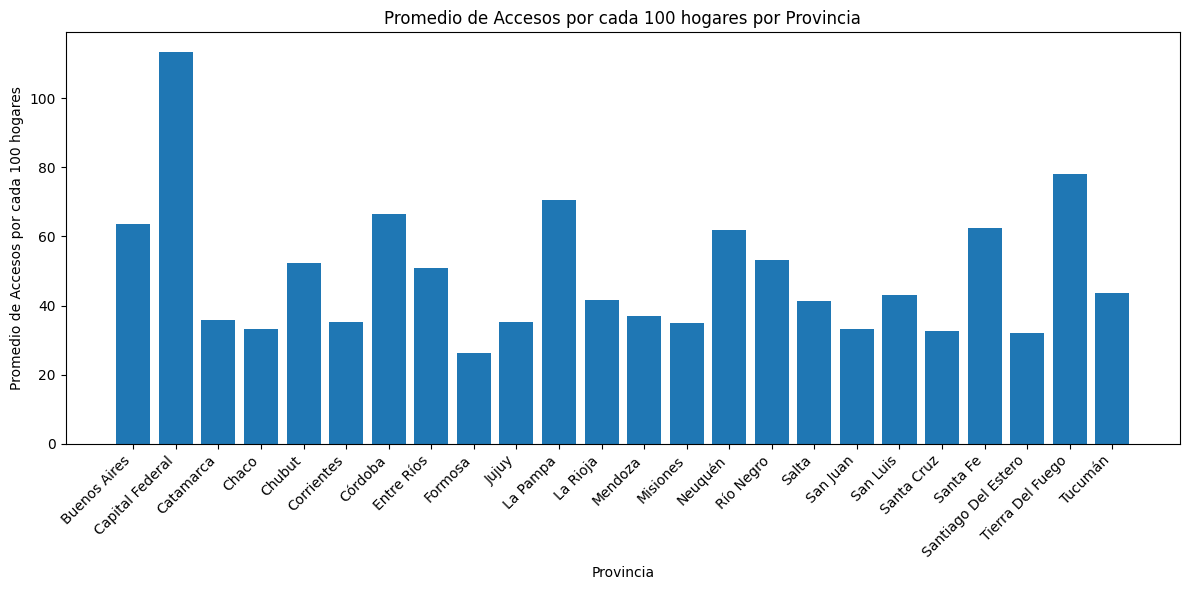

In [65]:
# Convertir las columnas a tipo string
columns = ["Accesos por cada 100 hogares"]
penetracion_prov_df[columns] = penetracion_prov_df[columns].astype(str)

# Eliminar los puntos en los datos de las columnas
for penet in columns:
    penetracion_prov_df[penet] = penetracion_prov_df[penet].str.replace(',', '.').str.replace('"', '')

# Convertir las columnas a tipo numérico
penetracion_prov_df[columns] = penetracion_prov_df[columns].apply(pd.to_numeric, errors='coerce')

# Calcular el promedio de "Accesos por cada 100 hogares" para cada provincia
promedio_por_provincia = penetracion_prov_df.groupby("Provincia")["Accesos por cada 100 hogares"].mean()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(promedio_por_provincia.index, promedio_por_provincia.values)

# Agregar título y etiquetas de los ejes
plt.title("Promedio de Accesos por cada 100 hogares por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Promedio de Accesos por cada 100 hogares")

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el histograma
plt.tight_layout()
plt.show()

##### 4.1 Variables Categóricas

##### *conectividad_df* 

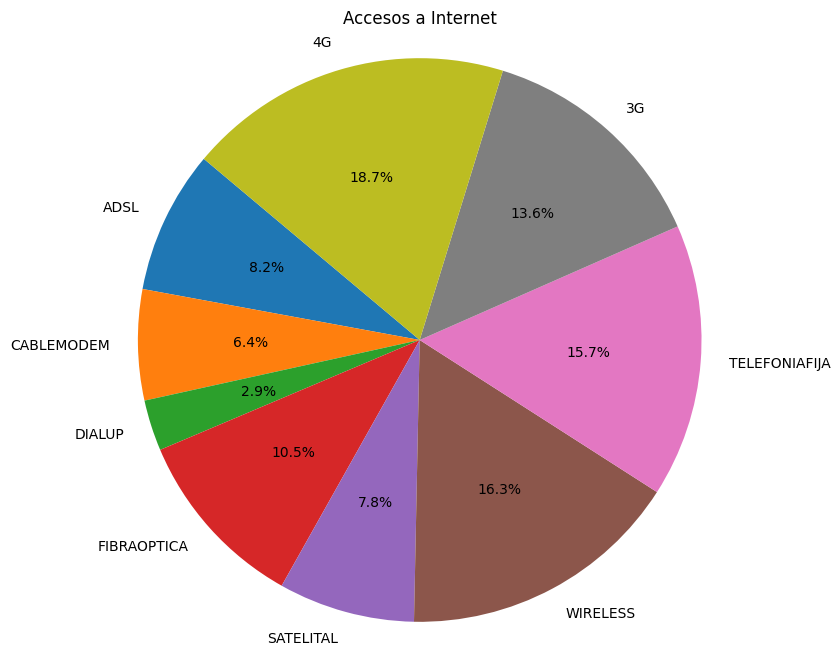

In [66]:
# Crear una lista con los nombres de las columnas de interés
columnas_interes = ["ADSL", "CABLEMODEM", "DIALUP", "FIBRAOPTICA", "SATELITAL", "WIRELESS", "TELEFONIAFIJA", "3G", "4G"]

# Contar la frecuencia de "SI" en cada columna y guardar los resultados en un diccionario
frecuencia_si = {columna: conectividad_df[columna].apply(lambda x: 1 if x == "SI" else 0).sum() for columna in columnas_interes}

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_si.values(), labels=frecuencia_si.keys(), autopct="%1.1f%%", startangle=140)

# Agregar título
plt.title("Accesos a Internet")

# Mostrar el gráfico
plt.axis("equal")
plt.show()

##### *localidades_df* 

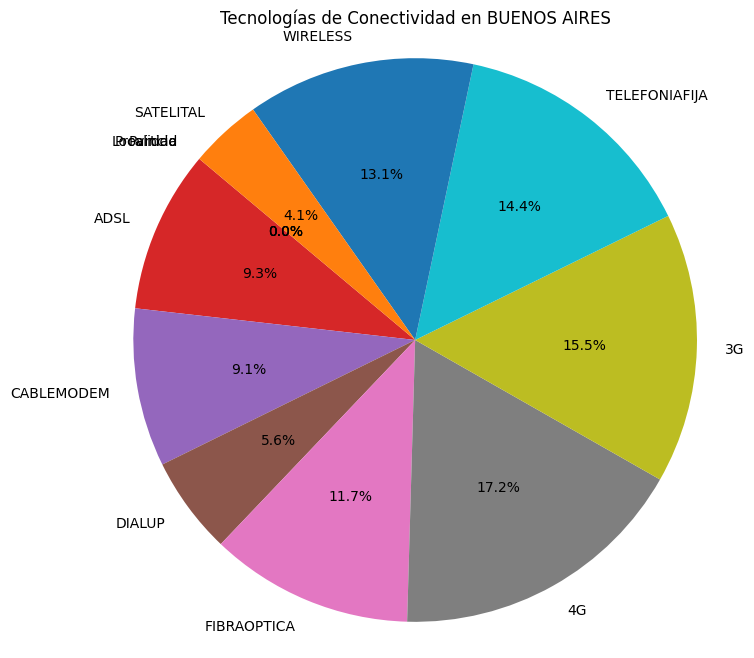

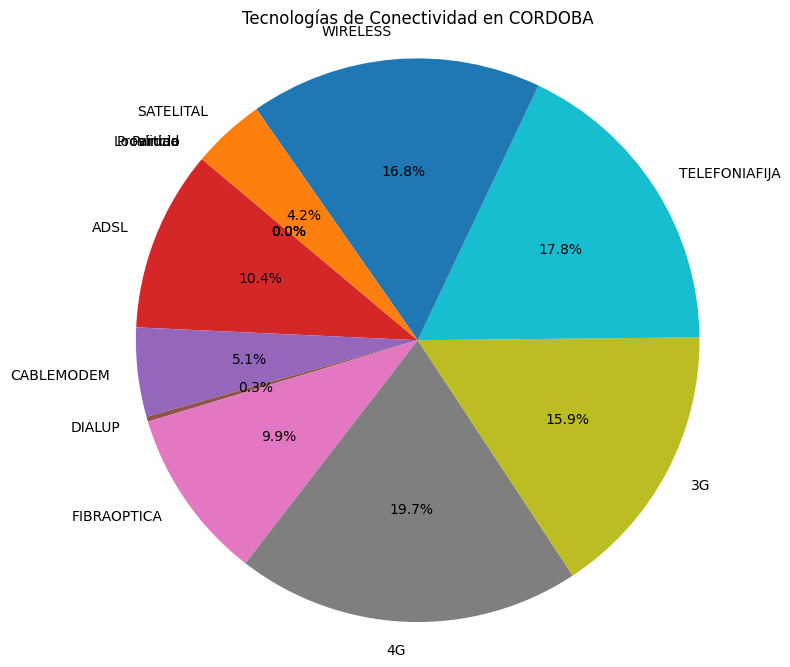

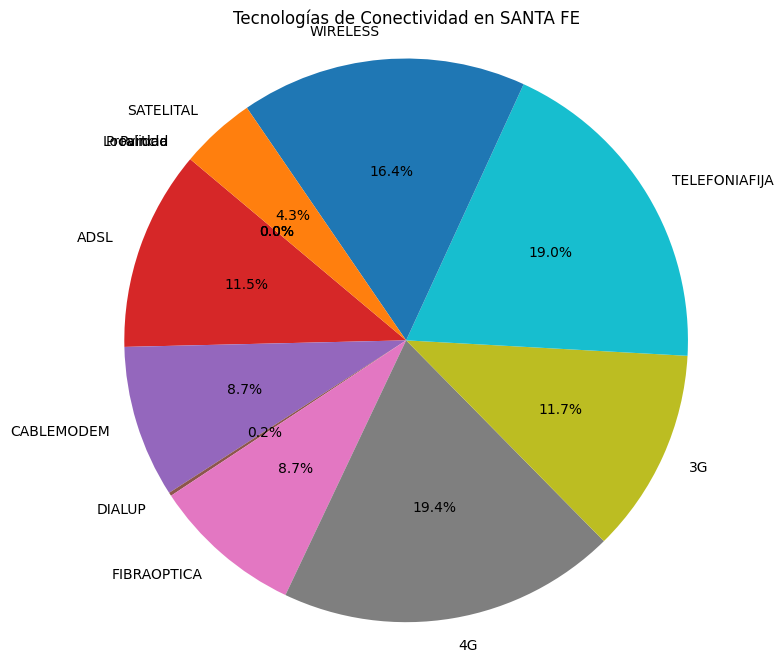

In [67]:
# Contar la frecuencia de cada provincia
frecuencia_provincias = localidades_df['Provincia'].value_counts()

# Obtener las tres provincias más frecuentes
tres_provincias_frecuentes = frecuencia_provincias.nlargest(3).index.tolist()

# Filtrar el dataset solo para las tres provincias más frecuentes
localidades_df_filtrado = localidades_df[localidades_df['Provincia'].isin(tres_provincias_frecuentes)]

# Crear un gráfico circular para cada provincia
for provincia in tres_provincias_frecuentes:
    # Obtener la frecuencia de "SI" para cada tecnología de conectividad
    frecuencia_si = localidades_df_filtrado[localidades_df_filtrado['Provincia'] == provincia].apply(lambda x: (x == 'SI').sum(), axis=0)
    
    # Crear el gráfico circular
    plt.figure(figsize=(8, 8))
    plt.pie(frecuencia_si, labels=frecuencia_si.index, autopct="%1.1f%%", startangle=140)
    
    # Agregar título con el nombre de la provincia
    plt.title(f"Tecnologías de Conectividad en {provincia}")
    
    # Mostrar el gráfico
    plt.axis("equal")
    plt.show()

In [ ]:
accesos_df.to_csv('Datasets/BI/accesos.csv', index=False) 
conectividad_df.to_csv('Datasets/BI/conectividad.csv', index=False)
velocidad_df.to_csv('Datasets/BI/velocidad.csv', index=False)
accesos_tecno_df.to_csv('Datasets/BI/accesos_tecno.csv', index=False)
accesos_vel_df.to_csv('Datasets/BI/accesos_vel.csv', index=False)
baf_prov_df.to_csv('Datasets/BI/baf_prov.csv', index=False)
baf_df.to_csv('Datasets/BI/baf.csv', index=False)
ingresos_df.to_csv('Datasets/BI/ingresos.csv', index=False)
penetracion_hab_df.to_csv('Datasets/BI/penetracion_hab.csv', index=False)
penetracion_prov_df.to_csv('Datasets/BI/penetracion_prov.csv', index=False)
localidades_df.to_csv('Datasets/BI/localidades.csv', index=False)


#### 5. Seleccion de KPIs

Durante este EDA, se evaluaron diversas variables y métricas relacionadas con el acceso a internet y los servicios de comunicación en diferentes regiones del país. A partir de esta revisión, se generó una lista de posibles KPIs relevantes que podrían ayudar a la empresa prestadora de servicios de telecomunicaciones a tomar decisiones estratégicas. De esta lista, se seleccionaron tres KPIs fundamentales que se consideraron más pertinentes para el análisis y que proporcionan información esencial para entender el panorama de la conectividad en Argentina.

A continuación, se presentan los tres KPIs seleccionados junto con la justificación de su elección:

- **Penetración de Internet:** Este KPI se refiere a la proporción de la población con acceso a internet en cada provincia. Es crucial comprender la penetración de internet, ya que proporciona información sobre el alcance del servicio en diferentes regiones y su impacto en la sociedad. Un alto porcentaje de penetración de internet en una provincia indicaría un mayor acceso a la información, oportunidades educativas y laborales, y una mayor interconexión con el resto del mundo.

- **Distribución de tecnologías de conexión:** Este KPI evalúa la distribución de las diferentes tecnologías de conexión utilizadas por los usuarios en cada provincia, como ADSL, Cablemódem, Fibra Óptica, entre otras. Conocer la distribución de tecnologías permitirá a la empresa entender las preferencias y necesidades de sus clientes en cada región, lo que facilitará la planificación y la optimización de la infraestructura para brindar servicios más adecuados y personalizados.

- **Velocidad promedio de descarga por provincia:** Este KPI mide la velocidad media de descarga de internet en cada provincia. La velocidad de conexión es un factor clave para la experiencia del usuario y el rendimiento de las aplicaciones y servicios en línea. Un análisis de la velocidad promedio de descarga por provincia permitirá identificar aquellas áreas con un rendimiento deficiente y focalizar esfuerzos para mejorar la calidad de la conexión.

Estos tres KPIs fueron seleccionados debido a su relevancia en el análisis de la conectividad en Argentina y su capacidad para proporcionar una visión completa de la situación actual. La Penetración de Internet y la Distribución de tecnologías de conexión permitirán comprender el acceso a internet en diferentes áreas, mientras que la Velocidad promedio de descarga por provincia ayudará a identificar áreas que requieren mejoras en términos de calidad de conexión.

Cabe mencionar que, aunque se consideraron otros KPIs sugeridos como la Proporción de hogares con acceso a banda ancha fija, estos tres KPIs seleccionados se consideraron más pertinentes para el objetivo específico de este análisis y para proporcionar información valiosa a la empresa prestadora de servicios de telecomunicaciones.

En el dashboard y el informe final, se detallarán los resultados y análisis obtenidos a partir de estos KPIs, brindando una comprensión sólida de la situación de las telecomunicaciones en Argentina y permitiendo la toma de decisiones informadas para mejorar los servicios y satisfacer las necesidades de los clientes.